# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import os

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 624


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_name = city_weather.get("name")
        city_lat = city_weather.get("coord", {}).get("lat")
        city_lng = city_weather.get("coord", {}).get("lon")
        city_max_temp = city_weather.get("main", {}).get("temp_max")
        city_humidity = city_weather.get("main", {}).get("humidity")
        city_clouds = city_weather.get("clouds", {}).get("all")
        city_wind = city_weather.get("wind", {}).get("speed")
        city_country = city_weather.get("sys", {}).get("country")
        city_date = city_weather.get("dt")

        # Append the City information into city_data list
        city_data.append({"City": city_name,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print(f"City {city} not found. Skipping... ({e})")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | grytviken
Processing Record 3 of Set 1 | blackmans bay
Processing Record 4 of Set 1 | griffith
Processing Record 5 of Set 1 | cabo san lucas
Processing Record 6 of Set 1 | bangui
Processing Record 7 of Set 1 | masterton
Processing Record 8 of Set 1 | corumba
Processing Record 9 of Set 1 | lobujya
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | colonia
Processing Record 12 of Set 1 | codrington
Processing Record 13 of Set 1 | borzya
Processing Record 14 of Set 1 | college
Processing Record 15 of Set 1 | homer
Processing Record 16 of Set 1 | hays
Processing Record 17 of Set 1 | ribeira grande
Processing Record 18 of Set 1 | papatowai
Processing Record 19 of Set 1 | thompson
Processing Record 20 of Set 1 | ilulissat
Processing Record 21 of Set 1 | port alfred
Processing Record 22 of Set 1 | saint-philippe
Processing Record 23 of

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          594
Lat           594
Lng           594
Max Temp      594
Humidity      594
Cloudiness    594
Wind Speed    594
Country       594
Date          594
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port-aux-Français,-49.3500,70.2167,43.03,95.0,96.0,16.69,TF,1.735933e+09
1,Grytviken,-54.2811,-36.5092,48.27,82.0,100.0,10.07,GS,1.735933e+09
2,Blackmans Bay,-43.0167,147.3167,57.33,91.0,75.0,3.89,AU,1.735933e+09
3,Griffith,41.5284,-87.4237,25.84,62.0,75.0,11.50,US,1.735933e+09
4,Cabo San Lucas,22.8909,-109.9124,79.11,50.0,0.0,6.91,MX,1.735933e+09


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Port-aux-Français,-49.3500,70.2167,43.03,95.0,96.0,16.69,TF,1.735933e+09
1,Grytviken,-54.2811,-36.5092,48.27,82.0,100.0,10.07,GS,1.735933e+09
2,Blackmans Bay,-43.0167,147.3167,57.33,91.0,75.0,3.89,AU,1.735933e+09
3,Griffith,41.5284,-87.4237,25.84,62.0,75.0,11.50,US,1.735933e+09
4,Cabo San Lucas,22.8909,-109.9124,79.11,50.0,0.0,6.91,MX,1.735933e+09


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

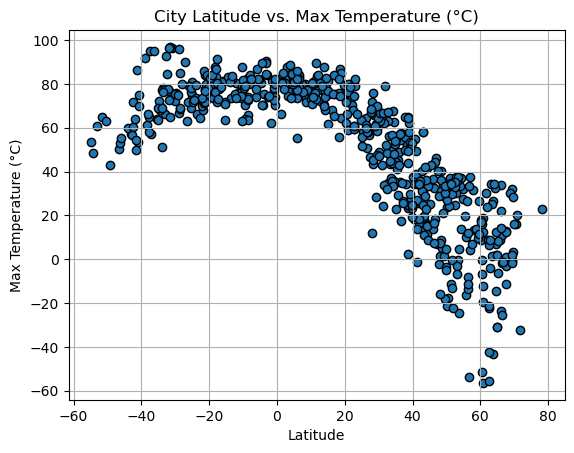

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (°C)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

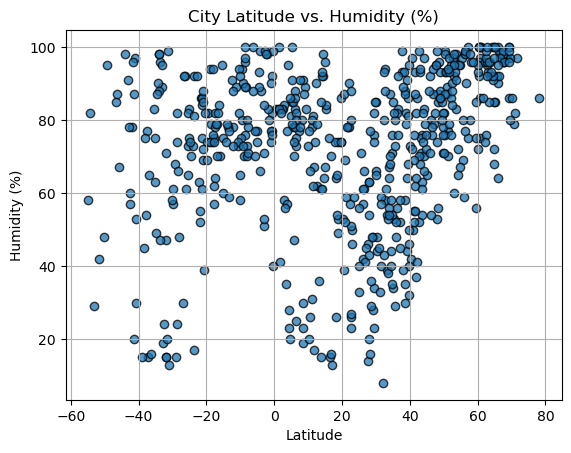

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

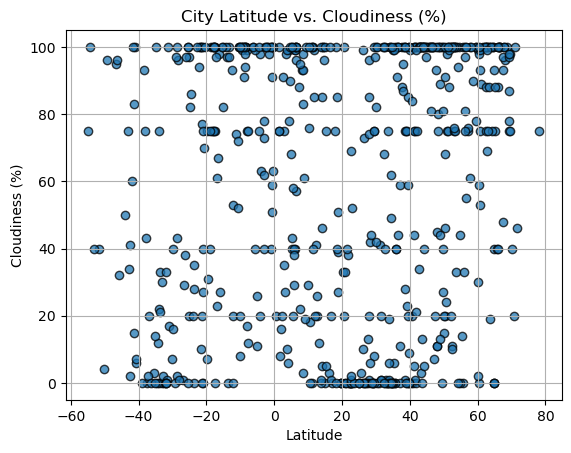

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

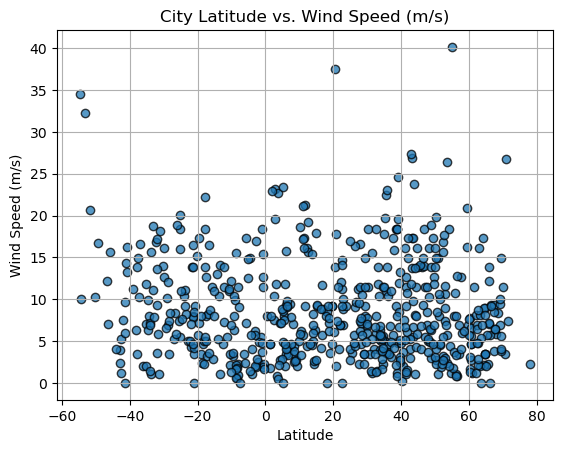

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, hemisphere):
    """
    Creates a scatter plot with a linear regression line.
    
    Parameters:
        x_values (array-like): X-axis values (e.g., Latitude)
        y_values (array-like): Y-axis values (e.g., Temperature, Humidity, etc.)
        title (str): Title of the plot
        xlabel (str): Label for the X-axis
        ylabel (str): Label for the Y-axis
        hemisphere (str): Hemisphere label to annotate the plot (e.g., "Northern Hemisphere")
    """
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    regression_line = slope * x_values + intercept
    
    # Create scatter plot
    plt.scatter(x_values, y_values, edgecolor="black", alpha=0.75)
    
    # Plot the regression line
    plt.plot(x_values, regression_line, color="red")
    
    # Annotate the plot with regression equation and r-squared
    plt.annotate(f"y = {slope:.2f}x + {intercept:.2f}\n$r^2$ = {r_value**2:.2f}",
                 (min(x_values) + 5, max(y_values) - 5), fontsize=12, color="red")
    
    # Add title and labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    
    # Save the plot
    #os.makedirs("output_data", exist_ok=True)  # Ensure the directory exists
    #file_name = f"output_data/{hemisphere.replace(' ', '_')}_{title.replace(': ', '_').replace(' ', '_')}.png"
    
    # Show the plot
    plt.show()

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,Griffith,41.5284,-87.4237,25.84,62.0,75.0,11.50,US,1.735933e+09
4,Cabo San Lucas,22.8909,-109.9124,79.11,50.0,0.0,6.91,MX,1.735933e+09
5,Bangui,4.3612,18.5550,79.03,23.0,99.0,2.71,CF,1.735933e+09
8,Lobujya,27.9500,86.8167,12.09,20.0,1.0,16.62,NP,1.735933e+09
10,Cologne,50.9333,6.9500,37.06,89.0,75.0,14.97,DE,1.735933e+09


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Port-aux-Français,-49.3500,70.2167,43.03,95.0,96.0,16.69,TF,1.735933e+09
1,Grytviken,-54.2811,-36.5092,48.27,82.0,100.0,10.07,GS,1.735933e+09
2,Blackmans Bay,-43.0167,147.3167,57.33,91.0,75.0,3.89,AU,1.735933e+09
6,Masterton,-40.9597,175.6575,53.28,97.0,100.0,14.29,NZ,1.735933e+09
7,Corumbá,-19.0092,-57.6533,76.91,94.0,40.0,3.44,BR,1.735933e+09


###  Temperature vs. Latitude Linear Regression Plot

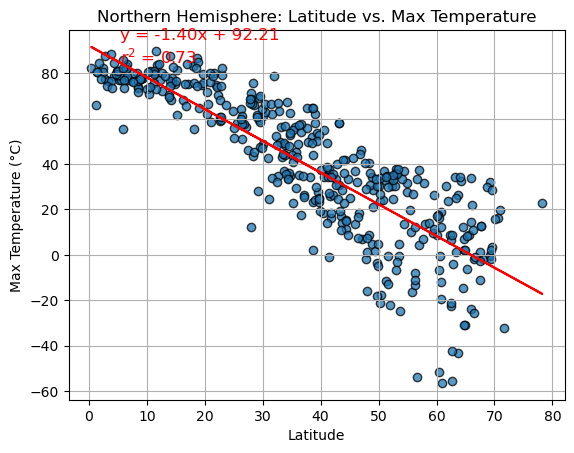

In [18]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

plot_linear_regression(x_values, y_values,
                       title="Northern Hemisphere: Latitude vs. Max Temperature",
                       xlabel="Latitude",
                       ylabel="Max Temperature (°C)",
                       hemisphere="Northern Hemisphere")

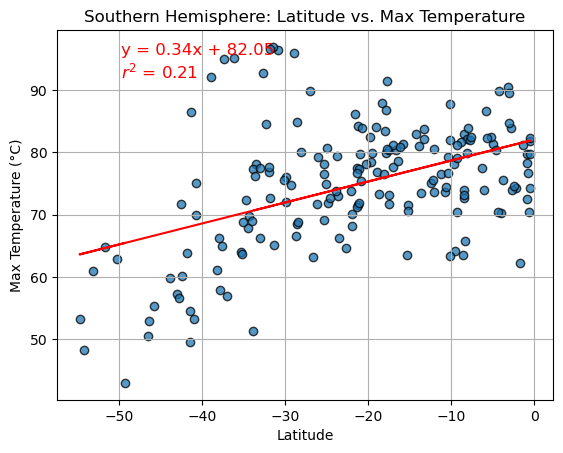

In [19]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

plot_linear_regression(x_values, y_values,
                       title="Southern Hemisphere: Latitude vs. Max Temperature",
                       xlabel="Latitude",
                       ylabel="Max Temperature (°C)",
                       hemisphere="Southern Hemisphere")

**Discussion about the linear relationship:** 
## Hemisphere Comparison

- In both hemispheres, the temperature generally increases as you approach the equator 0-degree latitude).
- The relationship is stronger and more consistent in the **Northern Hemisphere**, as indicated by the higher r value30.74 compared to the **Southern Hemisphere**10.23.

## Geographic Differences

- The Southern Hemisphere has more water coverage, which may moderate temperature variations and contribute to a weaker correlation.
- The Northern Hemisphere has more landmass, leading to more pronounced temperature changes with latitude.

## Climate Insight

- These results align with global climate patterns, where regions closer to the equator are generally warmer.
- Regions further from the equator experience colder temperatures due to reduced solar energy.
olar energy.


### Humidity vs. Latitude Linear Regression Plot

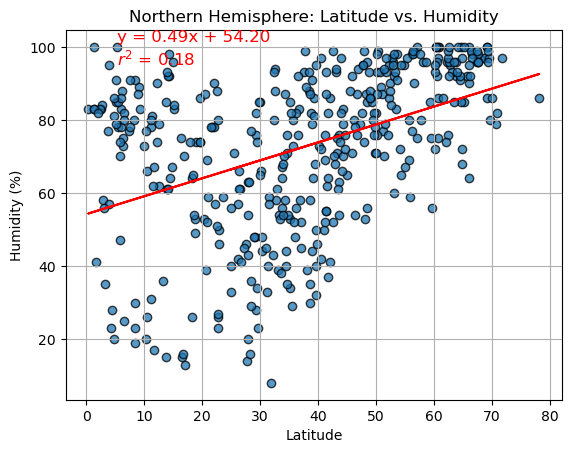

In [20]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the linear regression function
plot_linear_regression(x_values, y_values,
                       title="Northern Hemisphere: Latitude vs. Humidity",
                       xlabel="Latitude",
                       ylabel="Humidity (%)",
                       hemisphere="Northern Hemisphere")

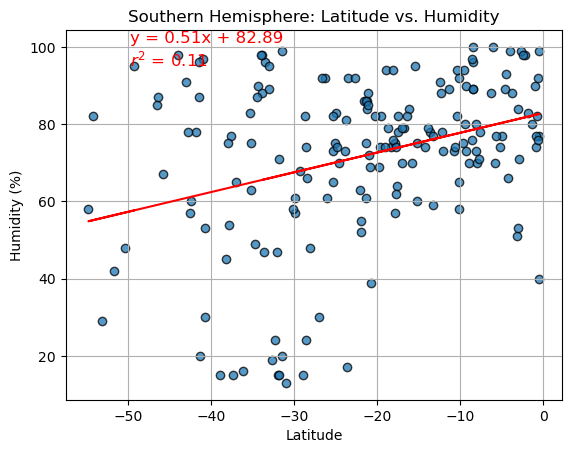

In [21]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the linear regression function
plot_linear_regression(x_values, y_values,
                       title="Southern Hemisphere: Latitude vs. Humidity",
                       xlabel="Latitude",
                       ylabel="Humidity (%)",
                       hemisphere="Southern Hemisphere")

**Discussion about the linear relationship:** 
- Latitude has a moderate impact on humidity in the **Northern Hemisphere** but a weak impact in the **Southern Hemisphere**.
- The Southern Hemisphere’s higher average humidity and weaker correlation with latitude suggest that water coverage and other local climatic factors have a larger influence than latitude.
- The relatively low \(r^2\) values for both hemispheres highlight the complexity of humidity, which is affected by multiple factors, including altitude, proximity to water bodies, and weather systems.


### Cloudiness vs. Latitude Linear Regression Plot

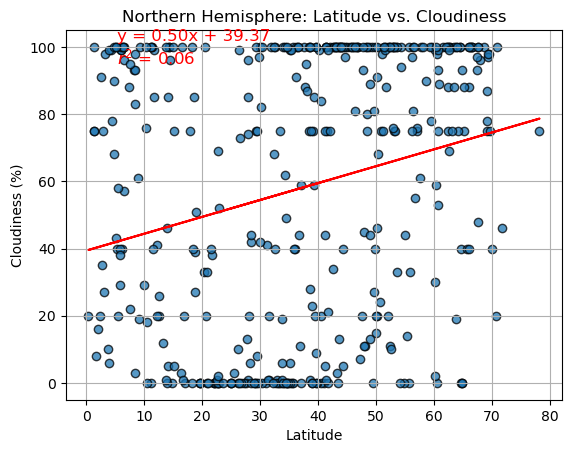

In [22]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the linear regression function
plot_linear_regression(x_values, y_values,
                       title="Northern Hemisphere: Latitude vs. Cloudiness",
                       xlabel="Latitude",
                       ylabel="Cloudiness (%)",
                       hemisphere="Northern Hemisphere")

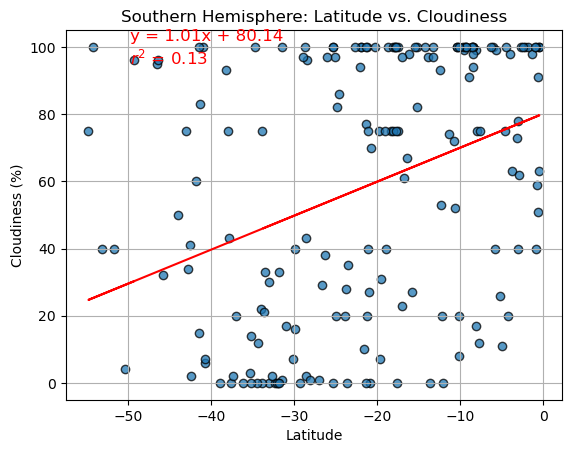

In [23]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the linear regression function
plot_linear_regression(x_values, y_values,
                       title="Southern Hemisphere: Latitude vs. Cloudiness",
                       xlabel="Latitude",
                       ylabel="Cloudiness (%)",
                       hemisphere="Southern Hemisphere")

**Discussion about the linear relationship:** 
## Latitude's Role

- Latitude has a weak effect on cloudiness in both hemispheres.
- Other factors, such as weather systems, altitude, and proximity to large bodies of water, likely have a greater impact.

## Southern Hemisphere Characteristics

- The Southern Hemisphere's higher intercept and steeper slope may reflect its larger ocean coverage, which contributes to higher average humidity and cloud formation.

## Weak Correlations

- The low \(r^2\) values highlight the complexity of cloudiness as a variable, driven by regional and local meteorological factors rather than latitude alone.


### Wind Speed vs. Latitude Linear Regression Plot

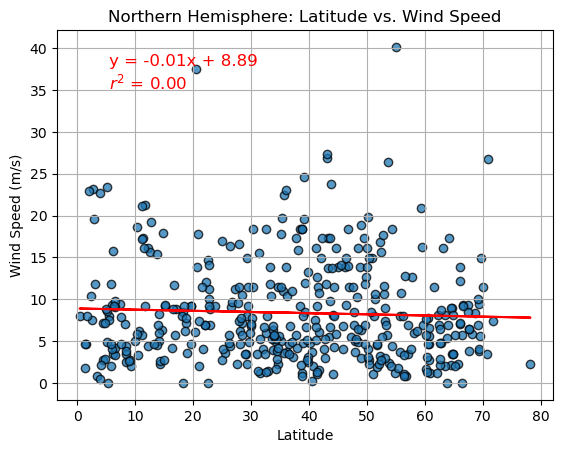

In [24]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the linear regression function
plot_linear_regression(x_values, y_values,
                       title="Northern Hemisphere: Latitude vs. Wind Speed",
                       xlabel="Latitude",
                       ylabel="Wind Speed (m/s)",
                       hemisphere="Northern Hemisphere")

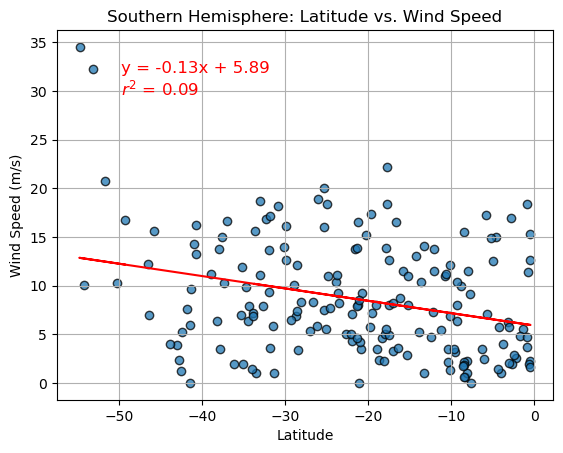

In [25]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the linear regression function
plot_linear_regression(x_values, y_values,
                       title="Southern Hemisphere: Latitude vs. Wind Speed",
                       xlabel="Latitude",
                       ylabel="Wind Speed (m/s)",
                       hemisphere="Southern Hemisphere")

**Discussion about the linear relationship:** 
## Latitude's Role

- Latitude has negligible impact on wind speed in the **Northern Hemisphere**.
- In the **Southern Hemisphere**, there is a weak negative correlation, possibly influenced by larger oceanic wind patterns and fewer landmasses.

## External Factors

Wind speed is likely driven by local and regional factors, including:
- **Topography** (e.g., mountain ranges affecting airflow).
- **Weather systems** (e.g., cyclones, high- and low-pressure systems).
- **Proximity to oceans or large landmasses**.

## Northern Hemisphere Variability

- Despite the lack of a latitude correlation, the **Northern Hemisphere’s** generally higher wind speeds may be due to more land-based weather systems and stronger pressure differentials.
